In [ ]:
#================================================================================
#
# Name: 01 Code Base.ipynb - Happy Days!
#
# Description: This notebook contains applies various machine learning algorithms:
#    - XGBoost
#    - Light GBM
#    - Random Forrest
#    - Catboost
#    - Logistic Regression
#    - Naive Bayes
#    - K-Nearest Neighbours
#    - Support Vector Machine
#    - Neural Network - Multilayer Perception
#    - SHAP Explanations
#
# Author: MT
# 
# Date: 2025-08-20
# 
# Steps:
# Step 0: Import Libraries
# Step 1: Read Data
# Step 2: Prepare Data
# Step 3: Models - XGBoost
# Step 4: Models - All Others
# Step 5: Results
# Step 6: Randomised Grid Search
# Step 7: Optuna
# 
#================================================================================

In [7]:
#================================================================================
# Step 0: Import Libraries

#--------------------
# Pandas and Numpy and copy
import pandas as pd
import numpy as np
import copy
pd.options.display.float_format = '{:.8f}'.format # supress scientific notation
pd.set_option('display.max_columns', 1000) # 1000 columns
#--------------------

#--------------------
# Plotly Express
import plotly.express as px
#--------------------

#--------------------
# Models
# XGBoost
from xgboost import XGBClassifier
import xgboost

# LightGBM
from lightgbm import LGBMClassifier

# Random Forrest
from sklearn.ensemble import RandomForestClassifier

# Naive Bayes
from sklearn.naive_bayes import GaussianNB

# Support Vector Machine
from sklearn.svm import SVC

# K-Nearest Neighbours
from sklearn.neighbors import KNeighborsClassifier

# Nerual Network
from sklearn.neural_network import MLPClassifier

# CATBoost
from catboost import CatBoostClassifier  

# Logistic REgression 
from sklearn.linear_model import LogisticRegression
#--------------------

#--------------------
# SHAP Explainability
import shap
shap.initjs()
#--------------------

#--------------------
# Model Performance
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import roc_auc_score, roc_curve
#--------------------

#--------------------
# Graphing
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
#--------------------

#--------------------
# Hyperparameter Optimisation
import optuna
#--------------------
#================================================================================

In [9]:
#================================================================================
# Step 1: Read Data

# Preg - Number of times pregnant Numeric
# GlucPlasma - glucose concentration at 2 Hours in an oral glucose tolerance test (GTIT)
# BP - Diastolic Blood Pressure (mm Hg)
# Skin Triceps - skin fold thickness (mm)
# Insulin 2-Hour Serum insulin (lh/ml)
# BMI - Body mass index [weight in kg/(Height in m)]
# DPF - Diabetes pedigree function
# Age - Age (years)
# Outcome - Binary value indicating non-diabetic /diabetic Factor [0,1]

df = pd.read_csv('pima-indians-diabetes.data.txt')
df.info()
#================================================================================

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Preg         768 non-null    int64  
 1   GlucPlasma   768 non-null    int64  
 2   BP           768 non-null    int64  
 3   SkinTriceps  768 non-null    int64  
 4   Insulin      768 non-null    int64  
 5   BMI          768 non-null    float64
 6   DPF          768 non-null    float64
 7   Age          768 non-null    int64  
 8   Outcome      768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [10]:
#================================================================================
# Step 2: Prepare Data

# Create X and y
X=df.loc[:,df.columns!='Outcome']
y=df.loc[:,df.columns=='Outcome']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=7)
#================================================================================


In [11]:
#================================================================================
# Step 3: Models - XGBoost

#--------------------
# XGBoost
model_xgb = XGBClassifier()
model_xgb.fit(X_train, y_train)
pred_xgb=model_xgb.predict_proba(X_test)[:,1]
pred_xgb=pd.DataFrame({'pred_xgb': model_xgb.predict_proba(X_test)[:,1]})
#--------------------

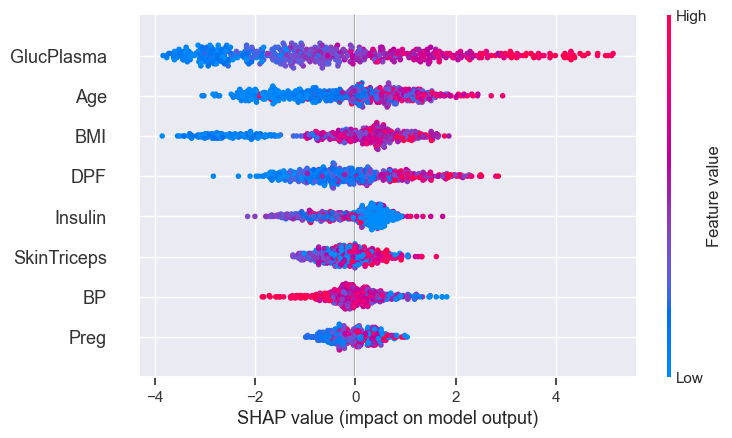

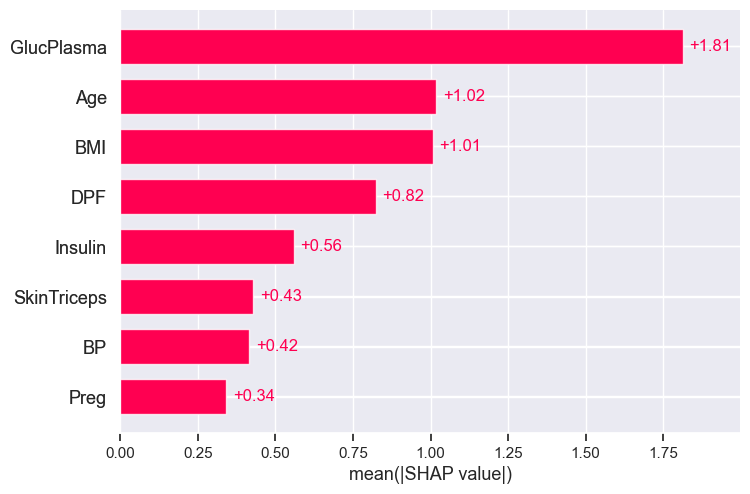

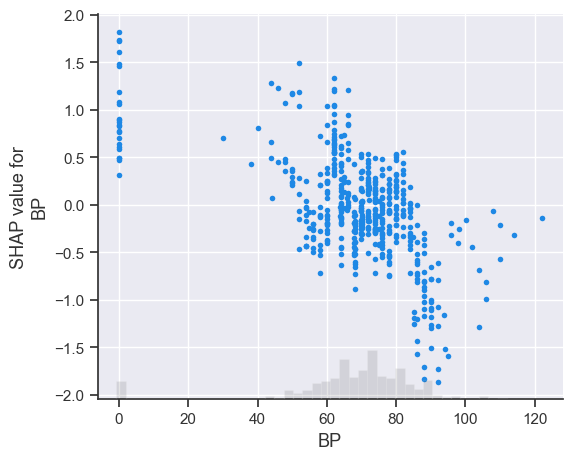

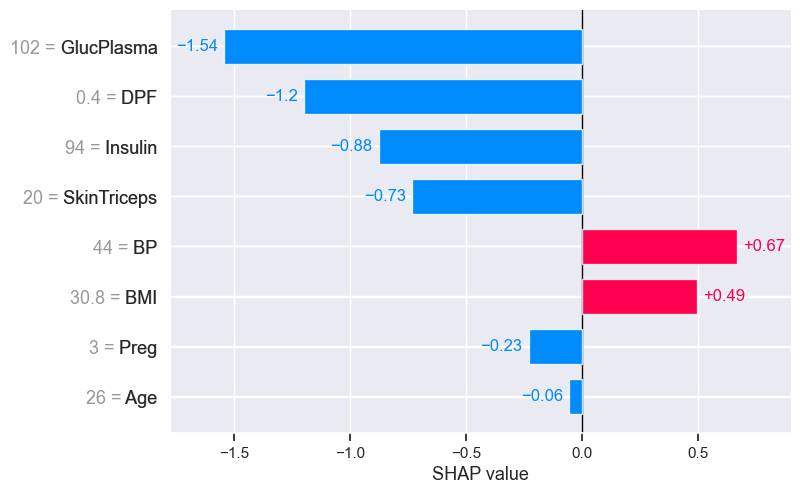

In [12]:
# SHAP Values
explainer = shap.TreeExplainer(model_xgb)
shap_values = explainer(X_train)

# Beeswarm
shap.plots.beeswarm(shap_values)

# Feature importance
shap.plots.bar(shap_values)

# Scatter plot
shap.plots.scatter(shap_values[:, "BP"])

# Waterfall
shap.plots.bar(shap_values[0])

# Force plot
shap.force_plot(shap_values[0])

In [13]:
# Feature importance - mean SHAP value
shap_df = pd.DataFrame(shap_values.values, columns=shap_values.feature_names)
shap_df.abs().mean(axis=0).sort_values(ascending=False)
#================================================================================

GlucPlasma    1.81224060
Age           1.01931405
BMI           1.00720119
DPF           0.82300079
Insulin       0.55879194
SkinTriceps   0.42819086
BP            0.41553146
Preg          0.34111181
dtype: float32

In [17]:
#================================================================================
# Step 4: Models - All Others

#--------------------
# Light GBM
model_lgb = LGBMClassifier(verbose=-1)
model_lgb.fit(X_train, y_train.iloc[:,0])
pred_lgb=pd.DataFrame({'pred_lgb': model_lgb.predict_proba(X_test)[:,1]})
#--------------------

In [18]:
#--------------------
# Random Forrest
model_rfc=RandomForestClassifier()
model_rfc.fit(X_train, y_train.iloc[:,0])
pred_rfc=pd.DataFrame({'pred_rfc': model_rfc.predict_proba(X_test)[:,1]})
#--------------------

In [19]:
#--------------------
# Catboost
model_cat=CatBoostClassifier(verbose=False)
model_cat.fit(X_train, y_train)
pred_cat=pd.DataFrame({'pred_cat': model_cat.predict_proba(X_test)[:,1]})
#--------------------

In [20]:
#--------------------
# Logistic Regression
model_lrg=LogisticRegression(penalty=None, solver='newton-cg')
model_lrg.fit(X_train, y_train.iloc[:,0])
pred_lrg=pd.DataFrame({'pred_lrg': model_lrg.predict_proba(X_test)[:,1]})
#--------------------

In [21]:
#--------------------
# Naive Bayes
model_nb=GaussianNB()
model_nb.fit(X_train,  y_train.iloc[:,0])
pred_nb=pd.DataFrame({'pred_nb': model_nb.predict_proba(X_test)[:,1]})
#--------------------

In [22]:
#--------------------
# K-Nearest Neighbours
model_knn=KNeighborsClassifier()
model_knn.fit(X_train, y_train.iloc[:,0])
pred_knn=pd.DataFrame({'pred_knn': model_knn.predict_proba(X_test)[:,1]})
#--------------------

In [23]:
#--------------------
# Support Vector Machine
model_svc=SVC(probability=True)
model_svc.fit(X_train, y_train.iloc[:,0])
pred_svc=pd.DataFrame({'pred_svc': model_svc.predict_proba(X_test)[:,1]})
#--------------------

In [24]:
#--------------------
# Neural Network - Multilayer Perception
model_mlp=MLPClassifier(hidden_layer_sizes=(10,), max_iter=2000)
model_mlp.fit(X_train, y_train.iloc[:,0])
pred_mlp=pd.DataFrame({'pred_mlp': model_mlp.predict_proba(X_test)[:,1]})
#--------------------
#================================================================================

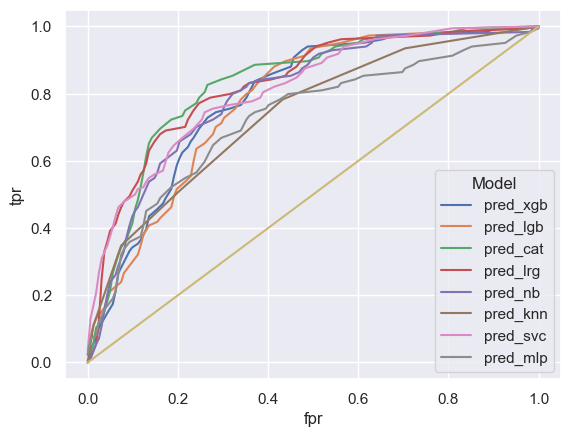

,Model,Gini
0,pred_cat,0.65821256
0,pred_lrg,0.65646806
0,pred_svc,0.62500000
0,pred_nb,0.59433709
0,pred_xgb,0.57729469
0,pred_lgb,0.56199678
0,pred_knn,0.47597960
0,pred_mlp,0.44994632


In [25]:
#================================================================================
# Step 5: Results

#--------------------
# Collate All Results
results=pd.concat([y_test.reset_index(drop=True), pred_xgb, pred_lgb, pred_cat, pred_lrg, pred_nb, pred_knn, pred_svc, pred_mlp], axis=1)
#--------------------

#--------------------
# Names and Number of Models
name_models=results.loc[:,results.columns!='Outcome'].columns
n_models=len(name_models)
#--------------------

#--------------------
# Loop Over All Models
for i in np.arange(n_models):

    # Initialise empty DataFrames
    if i==0:
        prep_auc=pd.DataFrame()
        prep_gini=pd.DataFrame()

    # Select the ith model
    this_model=name_models[i]

    # AUC
    fpr, tpr, _= roc_curve(y_true=results['Outcome'], y_score=results[this_model])
    t1= pd.DataFrame({'Model': this_model, 'fpr': fpr, 'tpr': tpr})
    prep_auc=pd.concat([prep_auc, t1], axis=0)

    # Gini
    Gini=roc_auc_score(y_true=results['Outcome'], y_score=results[this_model])*2-1
    t2=pd.DataFrame({'Model': this_model, 'Gini': Gini}, index=[0])
    prep_gini=pd.concat([prep_gini, t2], axis=0)
#--------------------

#--------------------
# Print Results
sns.lineplot(data=prep_auc, x='fpr', y='tpr', hue='Model', errorbar=None)
plt.plot([0, 1], [0, 1])
plt.show()

display(prep_gini.sort_values('Gini', ascending=False))
#--------------------
#================================================================================

In [16]:
#================================================================================
# Step 6: Randomised Grid Search

# https://medium.com/@rithpansanga/the-main-parameters-in-xgboost-and-their-effects-on-model-performance-4f9833cac7c
# https://datascience.stackexchange.com/questions/108233/recommendations-for-tuning-xgboost-hyperparams
# https://mikulskibartosz.name/xgboost-hyperparameter-tuning-in-python-using-grid-search
# https://www.kaggle.com/code/prashant111/a-guide-on-xgboost-hyperparameters-tuning

# Parameters Space
params = {
    'max_depth': np.arange (2, 11, 2).round(4),
    'n_estimators': np.arange(60, 400, 40).round(4),
    'learning_rate': [0.1, 0.01, 0.05, 0.01, 0.001],
    'subsample': np.arange(0.2,1.1,0.1).round(4), 
    'colsample_bytree': np.arange(0.2,1.1,0.1).round(4)
}

# Define Randomised Grid Search
grid_search = RandomizedSearchCV(
    estimator=XGBClassifier(),
    n_iter=300,
    param_distributions=params,
    scoring = 'roc_auc',
    n_jobs = -1,
    cv = 3,
    verbose=3,
    return_train_score=True,
    random_state=1023
)

# Run Randomised Grid Search
grid_search.fit(X_train, y_train)

# Tabulated Results
gsresults=pd.DataFrame(grid_search.cv_results_).sort_values('mean_test_score', ascending=False)
gsresults['OOF_Gini']=gsresults.mean_test_score*2-1
gsresults['IF_Gini']=gsresults.mean_train_score*2-1
display(gsresults.head(5))

# Best Model
print('Best Model: ', grid_search.best_estimator_)

# Test Gini
Test_p=grid_search.predict_proba(X_test)[:,1]
Test_Gini=roc_auc_score(y_true=y_test, y_score=Test_p)*2-1
print('Best Test Gini: ', Test_Gini)

# Train Gini
Train_p=grid_search.predict_proba(X_train)[:,1]
Train_Gini=roc_auc_score(y_true=y_train, y_score=Train_p)*2-1
print('Best Train Gini: ', Train_Gini)

# In-Fold Gini
print('In-Fold Gini', gsresults[gsresults.rank_test_score==1]['IF_Gini'].values)

# Out-of-Fold Gini
print('Out-of-Fold Gini', gsresults[gsresults.rank_test_score==1]['OOF_Gini'].values)

# Best Gini
print('Best Gini: ', grid_search.best_score_*2-1)

# Best Parameters
print('Best Parameters: ', grid_search.best_params_)

# Best Model Index
print('Best Index: ', grid_search.best_index_)

# Criteria
print('Criteria: ', grid_search.scorer_)

# Feature Names
print('Feature Names: ', grid_search.feature_names_in_)
#================================================================================

Fitting 3 folds for each of 300 candidates, totalling 900 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_subsample,param_n_estimators,param_max_depth,param_learning_rate,param_colsample_bytree,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score,OOF_Gini,IF_Gini
61,0.24327262,0.01124377,0.01297537,0.00194686,0.50000000,340,2,0.01000000,0.40000000,"{'subsample': 0.5, 'n_estimators': 340, 'max_d...",0.85945703,0.80988709,0.83686441,0.83540284,0.02026321,1,0.89914530,0.90632768,0.90995386,0.90514228,0.00449148,0.67080568,0.81028456
255,0.12721205,0.01121625,0.01158730,0.00331113,0.50000000,220,2,0.05000000,0.30000000,"{'subsample': 0.5, 'n_estimators': 220, 'max_d...",0.85210739,0.80195301,0.84972760,0.83459600,0.02310252,2,0.93280152,0.94482109,0.94259133,0.94007131,0.00522050,0.66919200,0.88014263
73,0.08559028,0.00308982,0.01070841,0.00283283,0.40000000,100,2,0.05000000,0.70000000,"{'subsample': 0.4, 'n_estimators': 100, 'max_d...",0.84820759,0.81446445,0.83943705,0.83403636,0.01429511,3,0.90567901,0.91623352,0.91543756,0.91245003,0.00479885,0.66807272,0.82490006
187,0.15121301,0.00986290,0.01510088,0.00134061,0.50000000,260,2,0.01000000,0.40000000,"{'subsample': 0.5, 'n_estimators': 260, 'max_d...",0.86095695,0.80439426,0.83625908,0.83387010,0.02315333,4,0.89321937,0.90188324,0.90371379,0.89960547,0.00457707,0.66774020,0.79921093
190,0.08892433,0.00421883,0.01343131,0.00356285,0.50000000,140,2,0.05000000,0.30000000,"{'subsample': 0.5, 'n_estimators': 140, 'max_d...",0.85105745,0.80363137,0.84579298,0.83349393,0.02122511,5,0.91506173,0.92685499,0.92761516,0.92317729,0.00574696,0.66698786,0.84635458


Best Model:  XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.4, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=340, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)
Best Test Gini:  0.6631776704240471
Best Train Gini:  0.7879236148466917
In-Fold Gini [0.81028456]
Out-of-Fold Gini [0.67080568]
Best Gini:  0.6708056838537384
Best Parameters:  {'subsample': 0.5, 'n_estimators': 340, 'max_depth': 2, 'lear

In [17]:
df=copy.deepcopy(gsresults[['IF_Gini', 'OOF_Gini']])
df['Diff']=df.IF_Gini-df.OOF_Gini

display(df.head(20))


fig = px.histogram(df, x="IF_Gini", nbins=20)
fig.show()


fig = px.scatter(x=df.OOF_Gini, y=df.Diff)
fig.show()

,IF_Gini,OOF_Gini,Diff
61,0.81028456,0.67080568,0.13947888
255,0.88014263,0.66919200,0.21095063
73,0.82490006,0.66807272,0.15682734
187,0.79921093,0.66774020,0.13147074
190,0.84635458,0.66698786,0.17936672
138,0.80881718,0.66632891,0.14248827
27,0.79654647,0.66549831,0.13104816
24,0.78726415,0.66413296,0.12313120
291,0.90327071,0.66377106,0.23949965
205,0.77060328,0.66372313,0.10688016


In [18]:
#================================================================================
# Step 7: Optuna

def objective(trial):

    param = {
        "objective": "binary:logistic",
        "eval_metric": "auc",
        "booster": 'gbtree',
        #"lambda": trial.suggest_float("lambda", 1e-8, 1.0, log=True),
        #"alpha": trial.suggest_float("alpha", 1e-8, 1.0, log=True),
        'eta': trial.suggest_float("eta", 1e-8, 1.0, log=True),
        'max_depth': trial.suggest_int("max_depth", 1,20,1),
        'min_child_weight' : trial.suggest_float("min_child_weight", 1e-8, 1.0, log=True),
        'subsample' : trial.suggest_float("subsample", 1e-8, 1.0, log=True),
        'colsample_bytree' : trial.suggest_float("colsample_bytree", 1e-8, 1.0, log=True),
    }

    dtrain = xgboost.DMatrix(X_train, label=y_train)
    dtest = xgboost.DMatrix(X_test, label=y_test)

    bst = xgboost.train(param, dtrain)
    preds = bst.predict(dtest)
    pred_labels = np.rint(preds)

    Gini = roc_auc_score(y_test, preds)*2-1
    return Gini

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)
print(study.best_trial)
#================================================================================

[I 2024-03-30 14:06:01,084] A new study created in memory with name: no-name-28492636-31bd-4d1e-bd17-ffd0d74ba417
[I 2024-03-30 14:06:01,179] Trial 0 finished with value: 0.0 and parameters: {'eta': 0.49790903550729415, 'max_depth': 10, 'min_child_weight': 3.266997106480727e-07, 'subsample': 8.448573339145845e-07, 'colsample_bytree': 0.000309647325602685}. Best is trial 0 with value: 0.0.
[I 2024-03-30 14:06:01,196] Trial 1 finished with value: 0.0 and parameters: {'eta': 2.535516098966622e-06, 'max_depth': 5, 'min_child_weight': 0.0021778427545121057, 'subsample': 2.158972061644309e-05, 'colsample_bytree': 1.359238601527132e-07}. Best is trial 0 with value: 0.0.
[I 2024-03-30 14:06:01,218] Trial 2 finished with value: 0.0 and parameters: {'eta': 5.860829623712927e-05, 'max_depth': 9, 'min_child_weight': 2.832360967544161e-06, 'subsample': 0.0008967589250428712, 'colsample_bytree': 0.008404362192394536}. Best is trial 0 with value: 0.0.
[I 2024-03-30 14:06:01,245] Trial 3 finished with

FrozenTrial(number=99, state=1, values=[0.6759930220075148], datetime_start=datetime.datetime(2024, 3, 30, 14, 6, 7, 810339), datetime_complete=datetime.datetime(2024, 3, 30, 14, 6, 7, 882659), params={'eta': 1.587226828937925e-07, 'max_depth': 19, 'min_child_weight': 1.54599555278586e-07, 'subsample': 0.39340468608893864, 'colsample_bytree': 0.999433786688034}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'eta': FloatDistribution(high=1.0, log=True, low=1e-08, step=None), 'max_depth': IntDistribution(high=20, log=False, low=1, step=1), 'min_child_weight': FloatDistribution(high=1.0, log=True, low=1e-08, step=None), 'subsample': FloatDistribution(high=1.0, log=True, low=1e-08, step=None), 'colsample_bytree': FloatDistribution(high=1.0, log=True, low=1e-08, step=None)}, trial_id=99, value=None)
